<a href="https://colab.research.google.com/github/bennyindierock-glitch/telecom-analysis/blob/main/S7_Version_Estudiante_Project_ConnectaTel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel.

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


---
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [ ]:
# importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')
usage = pd.read_csv('/datasets/usage.csv')

In [ ]:
plans.head(5)

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [ ]:
users.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [ ]:
usage.head(5)

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [ ]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)

plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [ ]:
# inspección de plans con .info()
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [ ]:
# inspección de users con .info()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [ ]:
# inspección de usage con .info()
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [ ]:
# cantidad de nulos para users
print(users.isna().sum())# Cantidad de valores nulos
print(users.isna().mean())# Proporción de valores nulos

user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64


In [ ]:
# cantidad de nulos para usage
print(usage.isna().sum())
print(usage.isna().mean())

id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64
id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64


Diagnóstico del bloque 💡

Dataset plans:
Contiene dos filas y ocho columnas, de las cuales una es de tipo object, cuatro son de tipo int64 y tres son de tipo float. No presenta valores nulos.

Dataset users:
Contiene 4,000 filas y ocho columnas, de las cuales dos son de tipo int64 y seis de tipo object. Presenta un 11 % de valores nulos en la columna city, por lo que se propone investigar su origen para decidir si se imputan o se eliminan.
Por otro lado, la columna churn_date presenta un 88 % de datos nulos; por ello, se recomienda ignorarla, ya que la confiabilidad del análisis de esta variable se ve comprometida por la elevada cantidad de valores ausentes y no presenta relacion con el resto de columnas.

Dataset usage:
Contiene 40,000 filas y seis columnas, de las cuales dos incluyen texto (object) y las restantes son numéricas (dos de tipo float64 y dos de tipo int64). La columna date presenta un porcentaje de 0.1 % de valores nulos, los cuales pueden eliminarse sin afectar la fiabilidad del análisis.
En contraste, la columna duration presenta un 55 % de valores nulos y la columna length un 44 %. Se propone mantener estos valores como NaN y analizar su uso de manera condicional según la variable type, ya que estos valores nulos responden a la naturaleza del tipo de actividad registrada.


### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [ ]:
# explorar columnas numéricas de users

users[['user_id', 'age']].describe()

,user_id,age
count,4000.000000,4000.000000
mean,11999.500000,33.739750
std,1154.844867,123.232257
min,10000.000000,-999.000000
25%,10999.750000,32.000000
50%,11999.500000,47.000000
75%,12999.250000,63.000000
max,13999.000000,79.000000


- La columna `user_id` ... Haz doble clic en este bloque y escribe qué ves.
- La columna `age` ...

In [ ]:
# explorar columnas numéricas de usage

usage[['id', 'user_id', 'duration', 'length']].describe()

,id,user_id,duration,length
count,40000.00000,40000.000000,17924.000000,22104.000000
mean,20000.50000,12002.405975,5.202237,52.127398
std,11547.14972,1157.279564,6.842701,56.611183
min,1.00000,10000.000000,0.000000,0.000000
25%,10000.75000,10996.000000,1.437500,37.000000
50%,20000.50000,12013.000000,3.500000,50.000000
75%,30000.25000,13005.000000,6.990000,64.000000
max,40000.00000,13999.000000,120.000000,1490.000000


- Las columnas `id` y `user_id`...Haz doble clic en este bloque y escribe qué ves.
- Las columnas ...

In [ ]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']
users[columnas_user].describe()


,city,plan
count,3531,4000
unique,7,2
top,Bogotá,Basico
freq,808,2595


- La columna `city` ...
- La columna `plan` ...

In [ ]:
# explorar columna categórica de usage
usage['type'].describe()

count     40000
unique        2
top        text
freq      22092
Name: type, dtype: object

- La columna `type` ...


✍️ Análisis de bloque.

De acuerdo al analisis se encontraron sentinelas o valores invalidos en la columna age del dataset users, edades con la siguiente cantidad (-999)
Adicional valores de 0 en las columnas duration y length del dataset usage, lo que debe investigarse mas a fondo pero por ahora no compromete el análisis

En la columna age se propone como hablamos de edades se propone winsorizar los valores de -999 con la mediana del todal de las edades para un mejor analisis y datos mas solidos.
De la misma manera los formatos se deben estandarizar, es por eso que se dede convertir a formato de fecha las columnas reg_date del dataset users y age de usage.

Una vez confirmada la conversion al formato correcto se debe confirmar la fiabilidad de los datos, es decir; que las fechas sean realistas.

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [ ]:

# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users['reg_date'])


In [ ]:
# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage['date'])

In [ ]:
# Revisar los años presentes en `reg_date` de users
print(users['reg_date'].dt.year.unique())

[2022 2026 2023 2024]


En `reg_date` aparecen un año nu transcurrido (2026)
se debe corregir esa fecha.

In [ ]:
# Revisar los años presentes en `date` de usage
print(usage['date'].dt.year.unique())

[2024.   nan]


En `date` esta presente el año 2024 y 50 nulos sin la informacion del año.

✍️ Diagnostico de bloque:

- En el análisis se identifican registros correspondientes a años pasados (2022 y 2023), los cuales son relevantes para medir la permanencia de los clientes. Adicionalmente, se detecta la presencia de un año que aún no ha transcurrido (2026); estos registros podrian considerarse errores de captura, por lo que se propone excluirlos del análisis para evitar representar actividad en periodos inexistentes.

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [ ]:
# Reemplazar -999 por la mediana de age
numeric_sentinels = [-999, 999]
age_mediana = users['age'].median()
users['age'] = users['age'].replace(numeric_sentinels, age_mediana)

# Verificar cambios
users['age'].describe()

count    4000.000000
mean       48.122250
std        17.690408
min        18.000000
25%        33.000000
50%        47.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [ ]:
# Reemplazar ? por NA en city
users['city'] = users['city'].replace('?', pd.NA)


# Verificar cambios
users['city'].describe()

count       3435
unique         6
top       Bogotá
freq         808
Name: city, dtype: object

In [ ]:
# Marcar fechas futuras como NA para reg_date
users['reg_date'] = pd.to_datetime(users['reg_date'], errors='coerce')

today = pd.Timestamp('today').normalize()

future_dates = users['reg_date'] > today

users.loc[future_dates, 'reg_date'] = pd.NaT

print(users['reg_date'].describe())


count                              3960
unique                             3960
top       2024-06-27 06:08:22.325581392
freq                                  1
first               2022-01-01 00:00:00
last                2024-12-31 00:00:00
Name: reg_date, dtype: object


### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [ ]:
# Verificación MAR en usage (Missing At Random) para duration

duration_pattern = usage.groupby('type')['duration'].agg(['count', lambda x: x.isna().sum()])
duration_pattern.columns = ['total', 'missing']
duration_pattern['missing_rate'] = (duration_pattern['missing'] / duration_pattern['total'] * 100).round(2)

print("Patrón de valores faltantes en DURATION por TYPE:")
print(duration_pattern)

Patrón de valores faltantes en DURATION por TYPE:
      total  missing  missing_rate
type                              
call  17908      0.0           0.0
text     16  22076.0      137975.0


In [ ]:
# Verificación MAR en usage (Missing At Random) para length
length_pattern = usage.groupby('type').agg({
    'length': ['count', lambda x: x.isna().sum(), 'size']
})
length_pattern.columns = ['non_null', 'missing', 'total_real']
length_pattern['missing_rate'] = (length_pattern['missing'] / length_pattern['total_real'] * 100).round(2)

print("Patrón CORRECTO de valores faltantes en LENGTH por TYPE:")
print(length_pattern)

Patrón CORRECTO de valores faltantes en LENGTH por TYPE:
      non_null  missing  total_real  missing_rate
type                                             
call        12  17896.0       17908         99.93
text     22092      0.0       22092          0.00


Análisis de nulos en duration y length:

duration: Los valores de duration para text están ausentes de manera sistemática, su ausencia depende únicamente del tipo de registro type. Esto cumple la definición de MAR.

length: Los valores faltantes de length solo ocurren cuando type es igual call, esto es un claro patrón MAR.

nota: ese metodo no lo vimos durante el curso, lo hice ayudandome de DOT.

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico.

**Instrucciones:**:
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [ ]:
# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas


# Agrupar información por usuario
usage_agg = usage.groupby('user_id').agg({
    'is_text': 'sum',      # Total de mensajes
    'is_call': 'sum',      # Total de llamadas
    'duration': 'sum'      # Total minutos de llamadas
}).reset_index()

# observar resultado
usage_agg.head(3)

,user_id,is_text,is_call,duration
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [ ]:
# Renombrar columnas
usage_agg.columns = ['user_id', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

# observar resultado
usage_agg.head(3)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [ ]:
# Combinar la tabla agregada con el dataset de usuarios
user_profile = users.merge(usage_agg, on='user_id', how='left')
user_profile.head(5)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [ ]:
# Resumen estadístico de las columnas numéricas
col_numericas = user_profile[['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']]

col_numericas.describe()

,age,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,4000.000000,3999.000000,3999.000000,3999.000000
mean,48.122250,5.524381,4.478120,23.317054
std,17.690408,2.358416,2.144238,18.168095
min,18.000000,0.000000,0.000000,0.000000
25%,33.000000,4.000000,3.000000,11.120000
50%,47.000000,5.000000,4.000000,19.780000
75%,63.000000,7.000000,6.000000,31.415000
max,79.000000,17.000000,15.000000,155.690000


In [ ]:
# Distribución porcentual del tipo de plan
percentage_distribution = user_profile['plan'].value_counts(normalize=True) * 100

print('Percentage Distribution')
print()
print(percentage_distribution)


Percentage Distribution

Basico     64.875
Premium    35.125
Name: plan, dtype: float64


---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada`

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda)

**Hint**  
Para cada histograma,
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

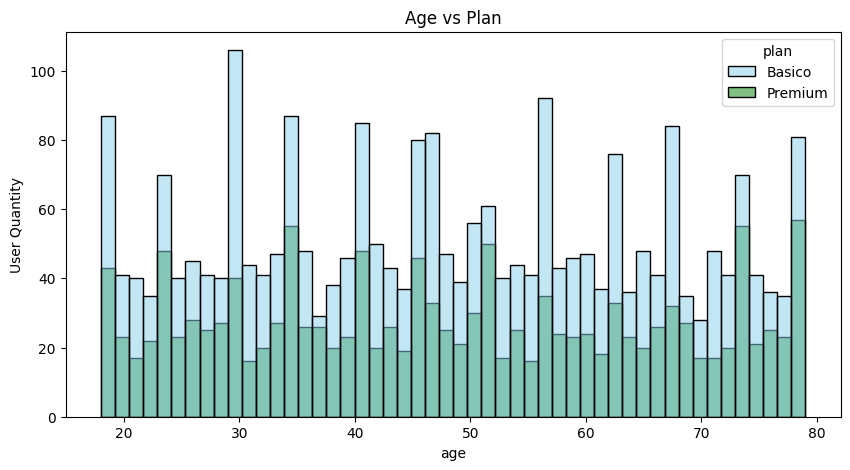

In [ ]:
# Histograma para visualizar la edad (age)

plt.figure(figsize=(10, 5))
sns.histplot(data=user_profile, x='age', hue='plan', palette=['skyblue','green'], bins= 50)
plt.title('Age vs Plan')
plt.xlabel('age')
plt.ylabel('User Quantity')
plt.show()


💡Insights:
- La distribucion muestra una mayor concentración relativa del plan Premium en los rangos de 20 a 40 años, mientras que el Básico domina en todos los grupos, especialmente en 30 y mayores de 50.

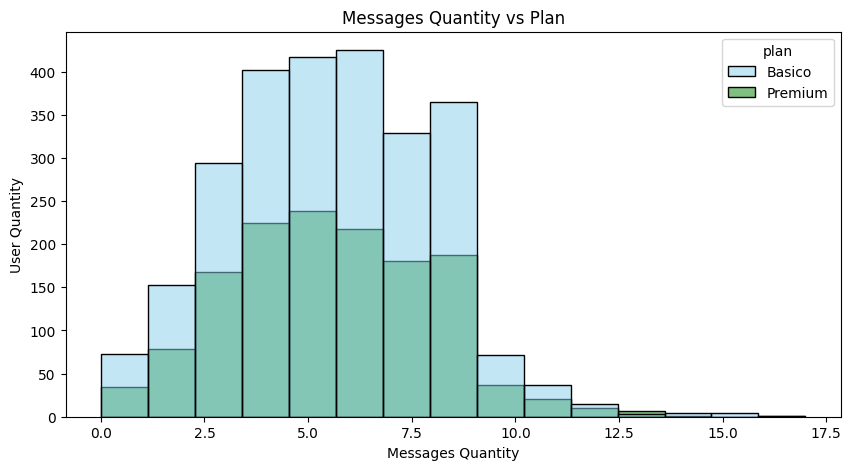

In [ ]:
# Histograma para visualizar la cant_mensajes

plt.figure(figsize=(10, 5))
sns.histplot(data=user_profile, x='cant_mensajes', hue='plan', palette=['skyblue','green'], bins= 15)
plt.title('Messages Quantity vs Plan')
plt.xlabel('Messages Quantity')
plt.ylabel('User Quantity')
plt.show()



💡Insights:
- La distribución esta sesgada a la derecha, la cantidad de mensajes muestra una mayor concentración de usuarios en el plan Básico, principalmente entre 3 y 7 mensajes. El plan Premium presenta un patrón similar, aunque con menor volumen y una dispersión más reducida. En ambos casos, los valores elevados de mensajes son poco frecuentes, observándose principalmente en el plan Básico.

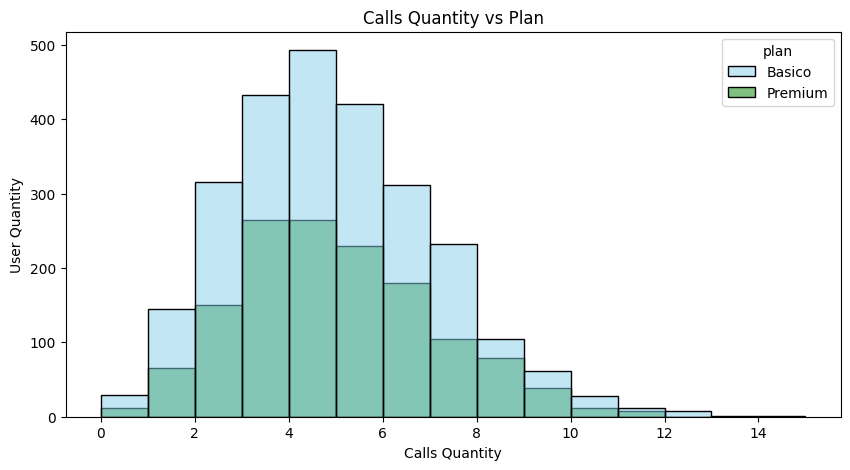

In [ ]:
# Histograma para visualizar la cant_llamadas
plt.figure(figsize=(10, 5))
sns.histplot(data=user_profile, x='cant_llamadas', hue='plan', palette=['skyblue','green'], bins= 15)
plt.title('Calls Quantity vs Plan')
plt.xlabel('Calls Quantity')
plt.ylabel('User Quantity')
plt.show()



💡Insights:
- Tanto el plan Básico como el plan Premium muestran un sesgo hacia la derecha; sin embargo, el plan Básico agrupa a más usuarios y presenta valores altos con mayor frecuencia.

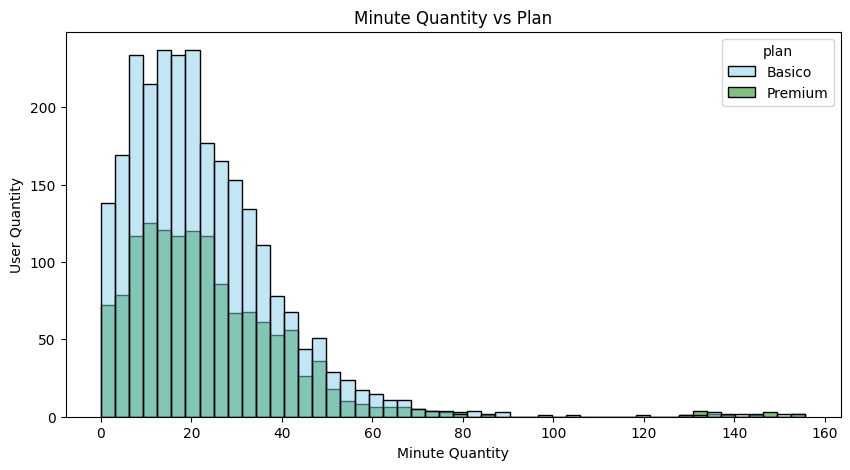

In [ ]:
# Histograma para visualizar la cant_minutos_llamada
plt.figure(figsize=(10, 5))
sns.histplot(data=user_profile, x='cant_minutos_llamada', hue='plan', palette=['skyblue','green'], bins= 50)
plt.title('Minute Quantity vs Plan')
plt.xlabel('Minute Quantity')
plt.ylabel('User Quantity')
plt.show()


💡Insights:
- La distribución de la cantidad de llamadas presenta un sesgo hacia la derecha en ambos planes, con una mayor concentración de usuarios en valores bajos y una cola extendida hacia valores altos.
Asi mismo indica que la mayoría de los usuarios realiza pocas o moderadas llamadas y un grupo reducido presenta un uso intensivo del servicio, generando el sesgo positivo.
El sesgo es más pronunciado en el plan Básico, debido a la presencia de valores atípicos altos.

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age`
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

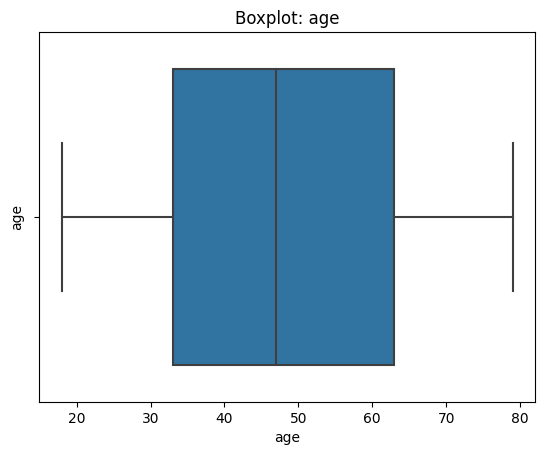

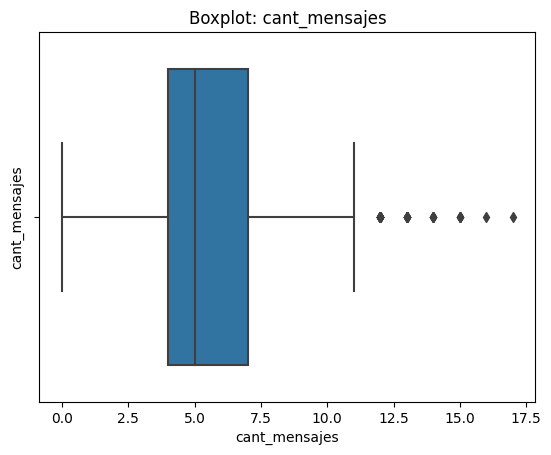

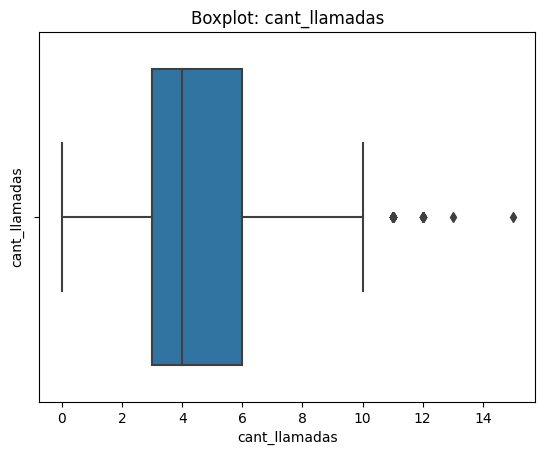

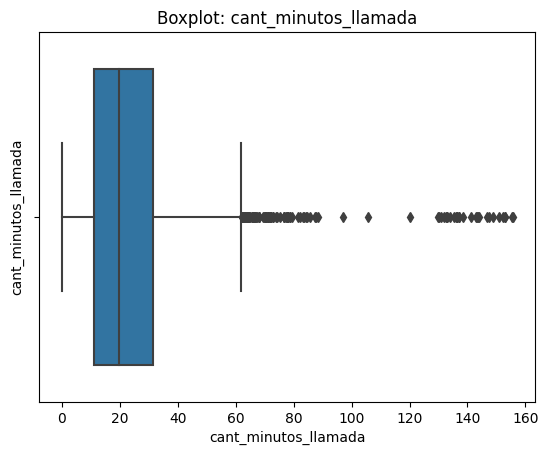

In [ ]:
# Visualizando usando BoxPlot
columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']


for col in columnas_numericas:
    plt.figure()
    sns.boxplot(user_profile[col])
    plt.title(f'Boxplot: {col}')
    plt.ylabel(col)
    plt.show()

💡Insights:
- Age: Es la columna mas estable; no presenta outliers
- cant_mensajes: Presenta Outliers
- cant_llamadas: Presenta Outliers
- cant_minutos_llamada: Presenta Outliers

In [ ]:
# Calcular límites con el método IQR
columnas_limites = ['age', 'cant_mensajes','cant_llamadas', 'cant_minutos_llamada']


for col in columnas_limites:
    data = user_profile[col]

    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    print(f'{col}')
    print(f'  Límite inferior: {limite_inferior}')
    print(f'  Límite superior: {limite_superior}')
    print()



age
  Límite inferior: -12.0
  Límite superior: 108.0

cant_mensajes
  Límite inferior: -0.5
  Límite superior: 11.5

cant_llamadas
  Límite inferior: -1.5
  Límite superior: 10.5

cant_minutos_llamada
  Límite inferior: -19.322500000000005
  Límite superior: 61.8575



In [ ]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()

,age,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,4000.000000,3999.000000,3999.000000,3999.000000
mean,48.122250,5.524381,4.478120,23.317054
std,17.690408,2.358416,2.144238,18.168095
min,18.000000,0.000000,0.000000,0.000000
25%,33.000000,4.000000,3.000000,11.120000
50%,47.000000,5.000000,4.000000,19.780000
75%,63.000000,7.000000,6.000000,31.415000
max,79.000000,17.000000,15.000000,155.690000


💡Insights:

cant_mensajes: Se considera que estos valores deben mantenerse, ya que pueden aportar información relevante sobre el comportamiento de determinados grupos de clientes. Esta información puede ser de gran valor para el diseño de estrategias de atracción y segmentación de clientes.

cant_llamadas: De igual manera, se recomienda conservar estos valores, dado que permiten identificar patrones de comportamiento en ciertos segmentos de clientes, lo cual resulta útil para el desarrollo de estrategias de atracción y retención.

cant_minutos_llamada: Estos valores deben mantenerse, ya que brindan información clave sobre el comportamiento general de un sector específico de clientes. Identificar a este grupo es fundamental para definir estrategias adecuadas de gestión y fidelización.

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [ ]:
# Crear columna grupo_uso
user_profile['grupo_uso'] = np.where(
    (user_profile['cant_llamadas'] < 5) & (user_profile['cant_mensajes'] < 5), "Bajo uso",
        np.where((user_profile['cant_llamadas'] < 10) & (user_profile['cant_mensajes'] < 10), "Uso Medio", "Alto Uso")
                        )





In [ ]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_edad,grupo_uso
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Adulto,Uso Medio
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Adulto,Alto Uso
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Adulto,Uso Medio
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Adulto Mayor,Alto Uso
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Adulto Mayor,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [ ]:
# Crear columna grupo_edad

user_profile['grupo_edad'] = np.where(
    user_profile['age'] < 30,
    'Joven',
    np.where(user_profile['age'] < 60,
    'Adulto', 'Adulto Mayor')
)


In [ ]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_edad,grupo_uso
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Adulto,Uso Medio
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Adulto,Alto Uso
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Adulto,Uso Medio
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Adulto Mayor,Alto Uso
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Adulto Mayor,Bajo uso


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

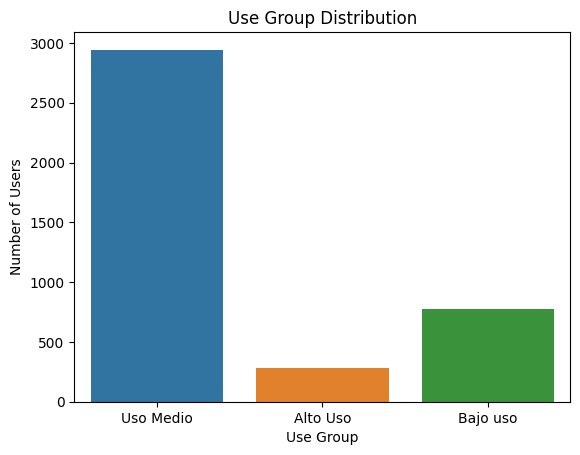

In [ ]:
# Visualización de los segmentos por uso
sns.countplot(data=user_profile, x='grupo_uso')
plt.title('Use Group Distribution')
plt.xlabel('Use Group')
plt.ylabel('Number of Users')
plt.show()



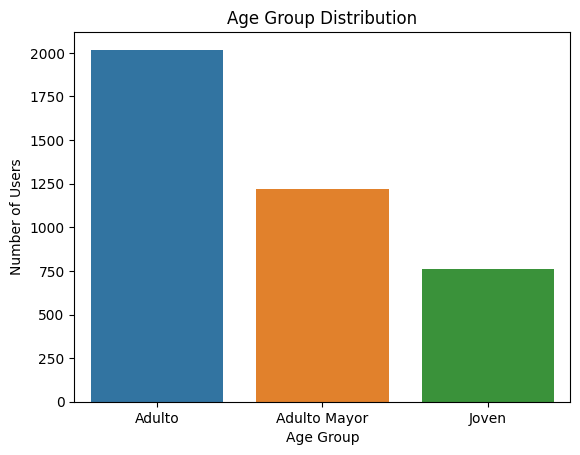

In [ ]:
# Visualización de los segmentos por edad

sns.countplot(data=user_profile, x='grupo_edad')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')

plt.show()




---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.



El análisis inició con el trabajo sobre tres datasets: plans.csv, users.csv y usage.csv.

Se realizó una investigación sobre los tipos de datos, revisando su estructura, homogeneidad y fiabilidad, así como la presencia de valores nulos en columnas clave.

Se encontró una alta proporción de valores nulos en la columna churn_date del dataset users, con un 88% de datos ausentes. De manera similar, en el dataset usage se identificaron valores nulos en las columnas duration y length, con un 55% y 44%, respectivamente.

En otra etapa del análisis se detectaron sentinelas o valores inválidos en la columna age del dataset users, específicamente edades con el valor -999. Adicionalmente, se observaron valores de 0 en las columnas duration y length del dataset usage.

Para la columna age, se propuso winsorizar los valores de -999 utilizando la mediana del total de las edades, con el fin de obtener un análisis más sólido y confiable. Asimismo, se estandarizaron los formatos de fecha y numéricos para garantizar la veracidad y consistencia de los datos.

Se identificaron tres segmentos relevantes de clientes según su edad:

Adultos (30 a 59 años): Representan el 50% de los clientes, por lo que constituyen el grupo principal a reminder en el diseño de estrategias de retención.

Adulto mayor (más de 59 años): Conforman el 30% del total de clientes, lo que también requiere atención en estrategias de retención y adquisición.

Jóvenes (menores de 30 años): Representan el 19% del total, lo que refleja una baja popularidad de los planes en este segmento; por ello, la empresa debe desarrollar estrategias específicas para atraer a estos clientes.

En términos de uso, el 76% de los usuarios presenta un uso medio, es decir, menos de 10 llamadas y mensajes. El 19% muestra un uso bajo, con menos de 5 llamadas y mensajes, mientras que solo un 5% corresponde a usuarios de alto consumo.

Los resultados muestran un comportamiento homogéneo en el uso de llamadas y mensajes entre los distintos grupos de edad. Tanto los promedios como las medianas se mantienen prácticamente constantes, lo que indica que la edad no representa un factor diferenciador relevante en el volumen de interacciones de los usuarios.






### Análisis ejecutivo


⚠️ **Problemas detectados en los datos**

Alta presencia de valores nulos en columnas clave: churn_date (88%) en users y duration (55%) y length (44%) en usage.

Existencia de sentinelas y valores inválidos, como edades -999 en age y valores 0 en duration y length, además de registros con fechas futuras (año 2026).


🔍 **Segmentos por Edad**
Adultos (30–59 años): Representan el 50% de los clientes, siendo el grupo principal y prioritario para estrategias de retención.

Adulto Mayor (>59 años): Conforman el 30% del total, lo que indica la necesidad de estrategias específicas de retención y fidelización.

Jóvenes (<30 años): Representan solo el 19%, reflejando una baja penetración de los planes en este segmento y una oportunidad clara de crecimiento.


📊 **Segmentos por Nivel de Uso**
Uso medio: El 76% de los usuarios presenta menos de 10 llamadas y mensajes, constituyendo el comportamiento predominante.

Uso bajo: El 19% de los usuarios realiza menos de 5 llamadas y mensajes.

Alto consumo: Solo el 5% de los clientes presenta un uso intensivo, identificado como outliers válidos y relevantes para el negocio.

➡️ Esto sugiere que l comportamiento de llamadas y mensajes es homogéneo entre los distintos grupos de edad, ya que las medias y medianas se mantienen prácticamente constantes.

La edad no es un factor diferenciador relevante en el nivel de uso, mientras que el tipo de usuario (nivel de consumo) resulta más determinante.


💡 **Recomendaciones de negocio**

Enfocar las estrategias comerciales en la retencions y upgrade al plan Premium del sector Adulto.

Enfocar las estrategias comerciales En el nivel de uso más que en la edad, y desarrollar campañas específicas para atraer al segmento joven, actualmente subrepresentado.


---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`